Import some prerequisites

In [433]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [434]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [435]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

In [436]:
def remove_circles(image):
    '''
    Returns the image with circles removed.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    # Convert image to grayscale
    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    
    # Use HoughCircles to detect circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=10,
                               param1=50, param2=50, minRadius=10, maxRadius=100)
    
    # If circles are detected, draw them on a mask and remove them from the original image
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(out_img, (x, y), r + 3, (0, 0, 0), -1)
    
    return out_img


Test your implementation (dont change this cell)

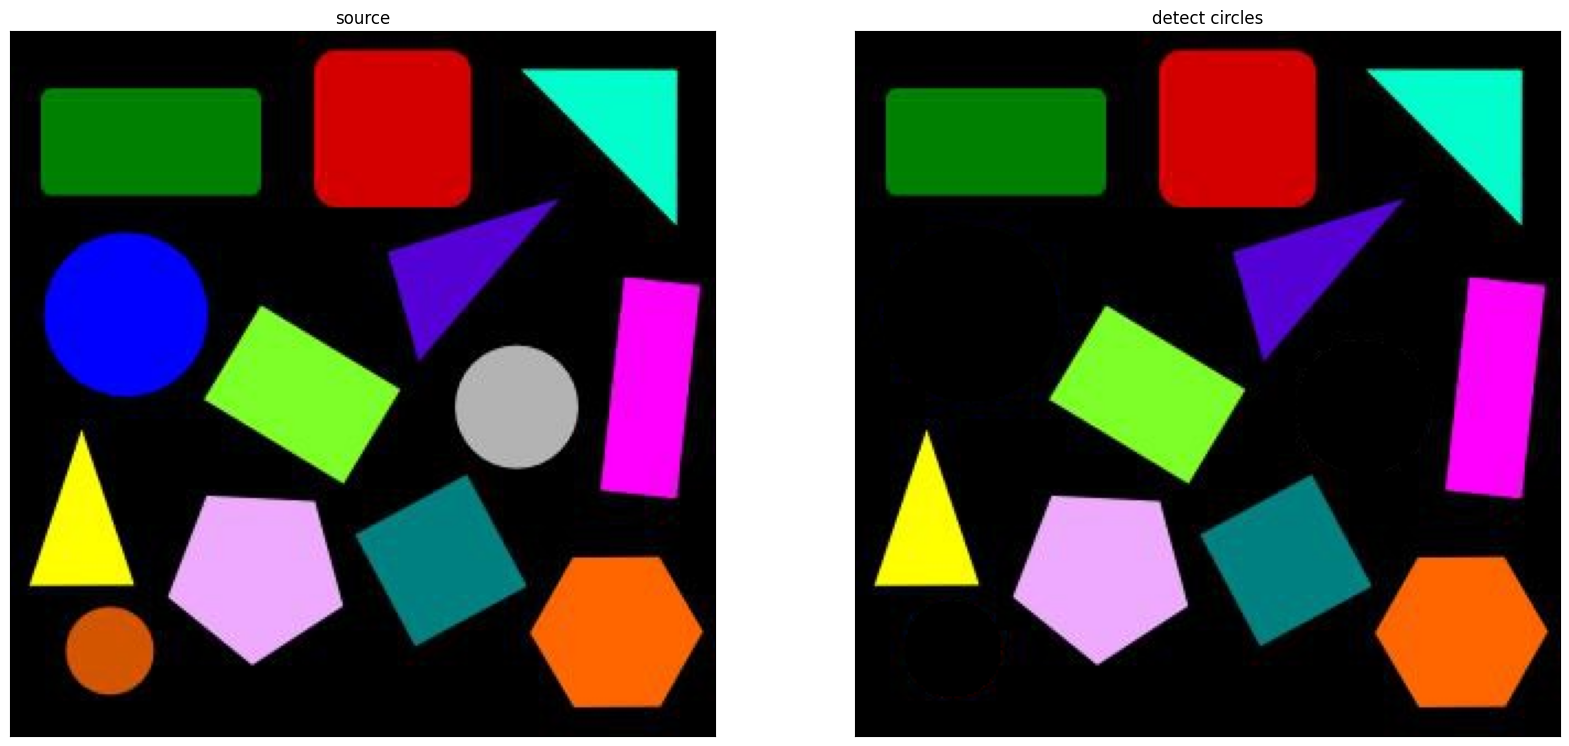

In [437]:
image_list = []

image = cv2.imread('1.jpg', cv2.IMREAD_UNCHANGED)
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [438]:
import cv2
import numpy as np

def detect_lines_hough(image):
    '''
    Returns the image with lines detected using Hough Line Transform.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image with detected lines.
    '''
    out_img = image.copy()
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 100, apertureSize=3)
    
    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=10, minLineLength=10, maxLineGap=10)
    
    # Draw detected lines on the output image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 5)
    
    return out_img


Test your implementation (dont change this cell)

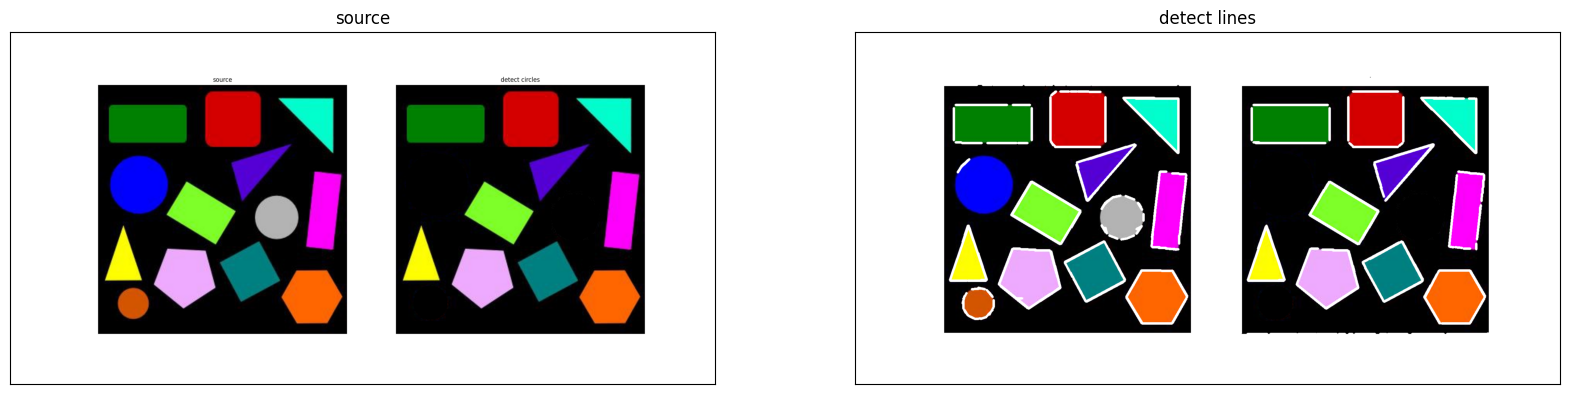

In [439]:
image_list = []

image = cv2.imread('q4a.png', cv2.IMREAD_UNCHANGED)
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

Emtiazi Part

In [440]:
import cv2
import numpy as np

def detect_lines_hough1(image):
    '''
    Returns the image with lines detected using Hough Line Transform.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image with detected lines.
    '''
    out_img = image.copy()
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLines(edges, rho=0.9, theta=np.pi/180, threshold=90)
    
    # Draw detected lines on the output image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    
    return out_img


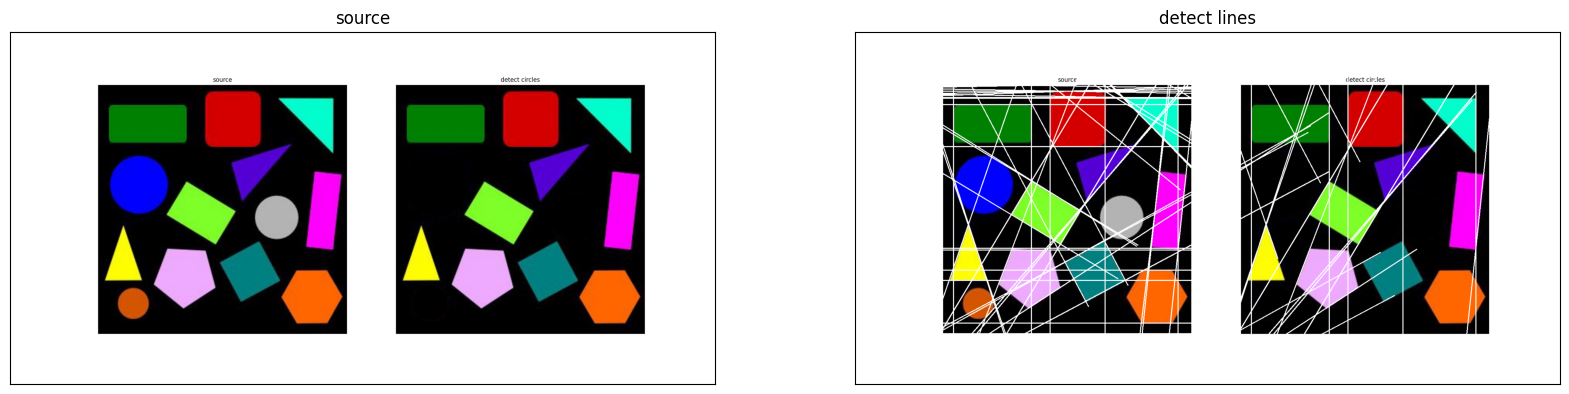

In [441]:
image_list = []

image = cv2.imread('q4a.png', cv2.IMREAD_UNCHANGED)
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough1(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b_emtiazi')

# part d

In [442]:
import cv2
import numpy as np

# Load the image
image7 = cv2.imread('7.jpg')

# Convert the image to grayscale
gray7 = cv2.cvtColor(image7, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges7 = cv2.Canny(gray7, 30, 100)

# Find contours in the image
contours, _ = cv2.findContours(edges7.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

approximates = []

for cnt in contours:
    # Get approximate polygon
    epsilon = 0.03 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    approximates.append(approx)

    # Draw the contour
    cv2.drawContours(image7, [approx], 0, (0, 255, 0), 2)

def classify_shapes(approximates):
    result = []
    for approx in approximates:
        vertice_cnt = len(approx)
        if vertice_cnt == 3:
            shape = "triangle"
        elif vertice_cnt == 4:
            # Cooridinates of the smallest rectangle that covers these points
            x, y, w, h = cv2.boundingRect(approx)
            w2h_ratio = float(w)/h
            if w2h_ratio >= 0.95 and w2h_ratio <= 1.05:
                shape = "square"
            else:
                shape = "rectangle"
        else:
            shape = "circle"
        x,y,w,h = cv2.boundingRect(approx)
        result.append((x,y,shape))
    return result

result = classify_shapes(approximates)
for item in result:
  x,y,shape = item[0], item[1], item[2]
  cv2.putText(image7, shape, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)


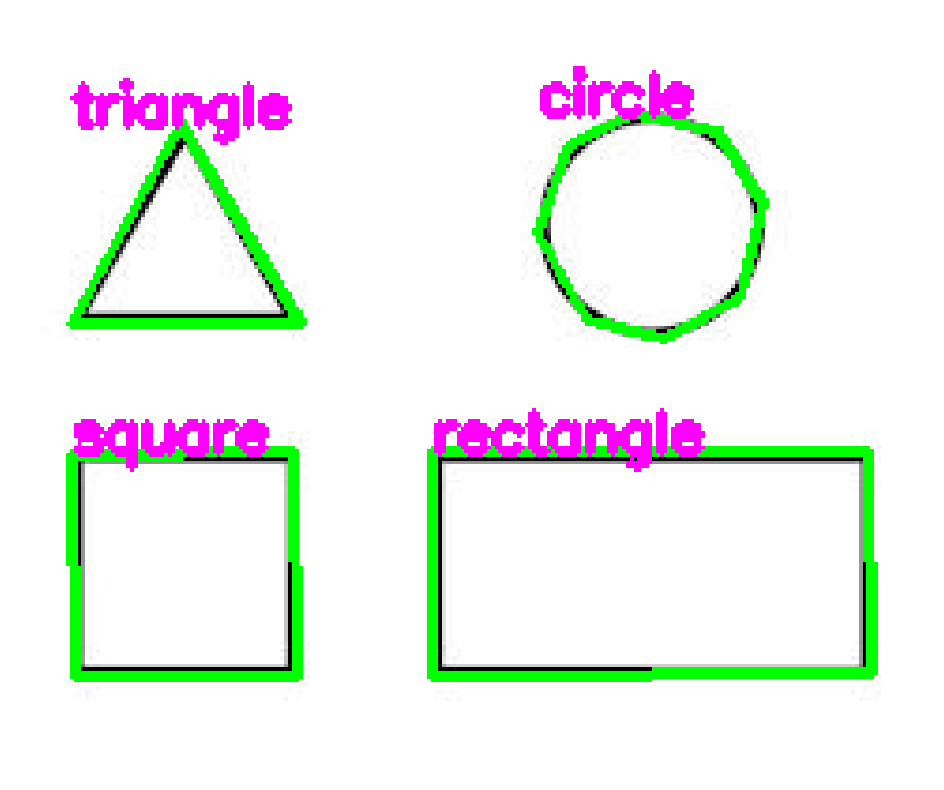

In [443]:
plt.imshow(image7)
plt.axis('off')
plt.show()